<a href="https://colab.research.google.com/github/imharshmishra87/Feature-Scaling-Ml/blob/main/handling_missing_values(_simple_imputer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Dealing With Numerical Data

In [ ]:
df=pd.read_csv('/content/missing_values_toy_dataset.csv')
df.shape

(700, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       550 non-null    float64
 1   fare      550 non-null    float64
 2   family    700 non-null    int64  
 3   survived  700 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.0 KB


In [ ]:
df.isnull().mean()

,0
age,0.214286
fare,0.214286
family,0.000000
survived,0.000000


## Imputation Using Mean and Median

/tmp/ipython-input-3155675453.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
/tmp/ipython-input-3155675453.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


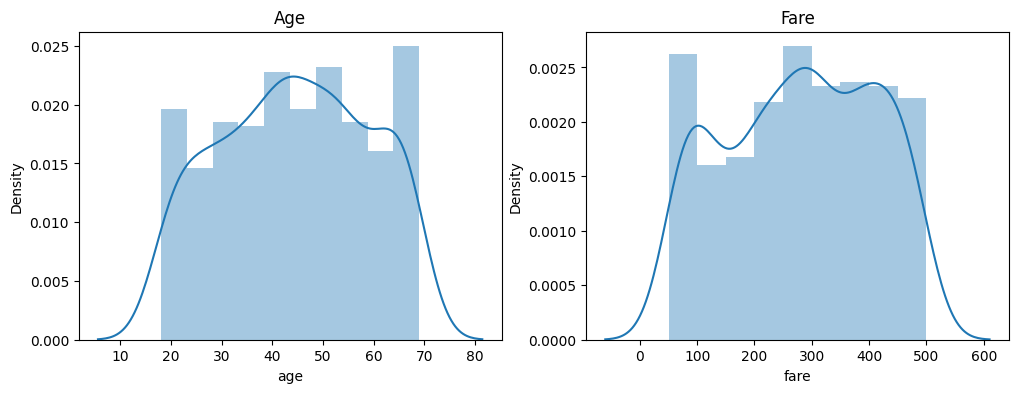

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Age')
sns.distplot(df['age'])

plt.subplot(122)
sns.distplot(df['fare'])
plt.title('Fare')
plt.show()

In [ ]:
age_mean=df['age'].mean()
age_median=df['age'].median()

fare_mean=df['fare'].mean()
fare_median=df['fare'].median()

In [ ]:
df['age_mean']=df['age'].fillna(age_mean)
df['age_median']=df['age'].fillna(age_median)

df['fare_mean']=df['age'].fillna(fare_mean)
df['fare_median']=df['age'].fillna(fare_median)

df.sample(5)

,age,fare,family,survived,age_mean,age_median,fare_mean,fare_median
485,54.0,340.999214,4,1,54.000000,54.0,54.000000,54.000000
361,36.0,449.357217,5,1,36.000000,36.0,36.000000,36.000000
245,NaN,291.416608,4,1,44.347273,44.5,279.437745,287.754299
433,45.0,209.242119,4,0,45.000000,45.0,45.000000,45.000000
664,26.0,124.869914,5,0,26.000000,26.0,26.000000,26.000000


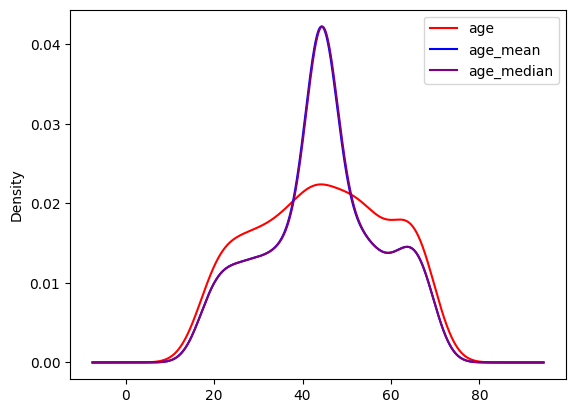

In [ ]:
fig=plt.figure()
ax=plt.subplot(111)

# original age column
df['age'].plot(kind='kde',color='red',ax=ax)

# Mean Imputation
df['age_mean'].plot(kind='kde',color='blue',ax=ax)

# Median Imputation
df['age_median'].plot(kind='kde',color='purple',ax=ax)

lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best' )

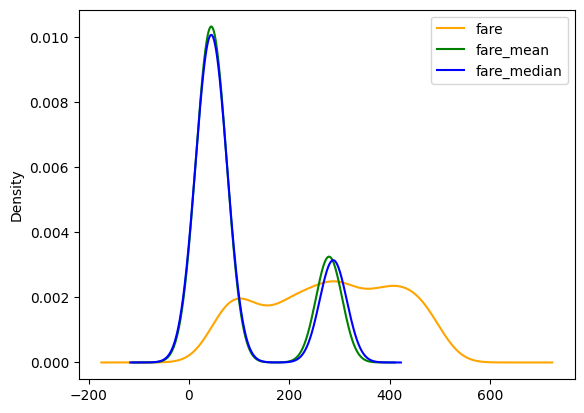

In [ ]:
fig=plt.figure()
ax2=plt.subplot(111)

# Original Fare
df['fare'].plot(kind='kde',color='orange',ax=ax2)

# Mean Fare
df['fare_mean'].plot(kind='kde',color='green',ax=ax2)

# Median Fare
df['fare_median'].plot(kind='kde',color='blue',ax=ax2)

lines, labels=ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='best' )

## Analysing The Covariance

In [ ]:
print('Original Covariance of fare : {}'.format(df['fare'].var()))
print('Mean Covariance of fare : {}'.format(df['fare_mean'].var()))
print('Median Covariance of fare : {}'.format(df['fare_median'].var()))


print('Original Covariance of age : {}'.format(df['age'].var()))
print('Mean Covariance of age : {}'.format(df['age_mean'].var()))
print('Median Covariance of age : {}'.format(df['age_median'].var()))

Original Covariance of fare : 16890.429316965092
Mean Covariance of fare : 9486.838163620814
Median Covariance of fare : 10157.80619192051
Original Covariance of age : 214.25623116410006
Mean Covariance of age : 168.27849915463645
Median Covariance of age : 168.28243204577976


In [ ]:
df.cov()

,age,fare,family,survived,age_mean,age_median,fare_mean,fare_median
age,214.256231,109.156049,-0.824935,0.230518,214.256231,214.256231,214.256231,214.256231
fare,109.156049,16890.429317,2.144394,-0.638172,86.114533,86.063783,7.996250,5.232740
family,-0.824935,2.144394,2.971140,0.003217,-0.647910,-0.646896,0.913594,0.968834
survived,0.230518,-0.638172,0.003217,0.249834,0.181051,0.179428,-2.317356,-2.405740
age_mean,214.256231,86.114533,-0.647910,0.181051,168.278499,168.278499,168.278499,168.278499
age_median,214.256231,86.063783,-0.646896,0.179428,168.278499,168.282432,174.332331,174.546491
fare_mean,214.256231,7.996250,0.913594,-2.317356,168.278499,174.332331,9486.838164,9816.491278
fare_median,214.256231,5.232740,0.968834,-2.405740,168.278499,174.546491,9816.491278,10157.806192


## Analysing The corelation

In [ ]:
df.corr()

,age,fare,family,survived,age_mean,age_median,fare_mean,fare_median
age,1.000000,0.055995,-0.032895,0.031552,1.000000,1.000000,1.000000,1.000000
fare,0.055995,1.000000,0.009505,-0.009827,0.050146,0.050116,0.000635,0.000402
family,-0.032895,0.009505,1.000000,0.003734,-0.028976,-0.028930,0.005442,0.005577
survived,0.031552,-0.009827,0.003734,1.000000,0.027923,0.027672,-0.047600,-0.047755
age_mean,1.000000,0.050146,-0.028976,0.027923,1.000000,0.999988,0.133184,0.128711
age_median,1.000000,0.050116,-0.028930,0.027672,0.999988,1.000000,0.137974,0.133503
fare_mean,1.000000,0.000635,0.005442,-0.047600,0.133184,0.137974,1.000000,0.999990
fare_median,1.000000,0.000402,0.005577,-0.047755,0.128711,0.133503,0.999990,1.000000


## Box Plot Analysis

<Axes: >

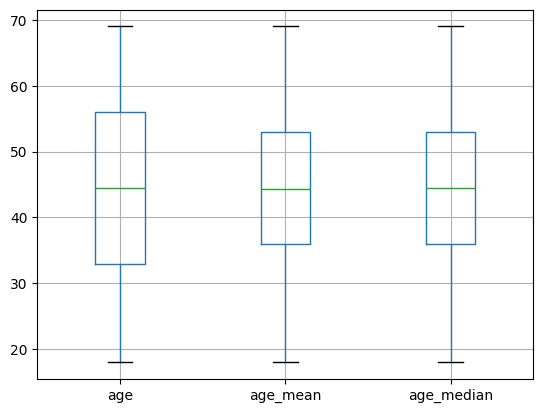

In [ ]:
df[['age','age_mean','age_median']].boxplot()

<Axes: >

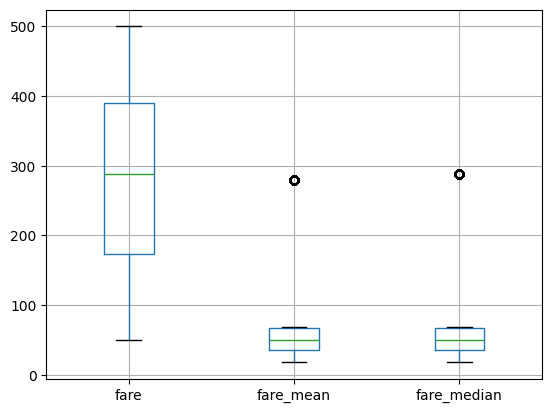

In [ ]:
df[['fare','fare_mean','fare_median']].boxplot()

In [ ]:
## Using Sklearn Class Numerical Imputation

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['survived'],axis=1),df['survived'])

In [ ]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

tfs1=ColumnTransformer(transformers=[('first',imputer1,['age']),('second',imputer2,['fare'])],remainder='passthrough')
tfs1.fit_transform(X_train)
tfs1.transform(X_test)

array([[ 46.        , 222.84077517,   0.        , ...,  46.        ,
         46.        ,  46.        ],
       [ 44.82650602, 289.67113373,   1.        , ...,  44.5       ,
        279.43774516, 287.75429935],
       [ 44.82650602, 289.67113373,   3.        , ...,  44.5       ,
        279.43774516, 287.75429935],
       ...,
       [ 40.        , 256.85668074,   5.        , ...,  40.        ,
         40.        ,  40.        ],
       [ 30.        , 495.56676774,   2.        , ...,  30.        ,
         30.        ,  30.        ],
       [ 22.        ,  71.12541072,   4.        , ...,  22.        ,
         22.        ,  22.        ]])

## Arbitary Distribution

In [ ]:
tfs2=ColumnTransformer(transformers=[('second',SimpleImputer(strategy='constant',fill_value=99),['age','fare'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
transformed=tfs2.fit_transform(X_train)
tfs2.transform(X_test)

,age,fare,family,age_mean,age_median,fare_mean,fare_median
571,46.0,222.840775,0,46.000000,46.0,46.000000,46.000000
520,99.0,99.000000,1,44.347273,44.5,279.437745,287.754299
462,99.0,99.000000,3,44.347273,44.5,279.437745,287.754299
10,99.0,376.754380,1,44.347273,44.5,279.437745,287.754299
555,29.0,409.095195,5,29.000000,29.0,29.000000,29.000000
...,...,...,...,...,...,...,...
631,99.0,135.149693,3,44.347273,44.5,279.437745,287.754299
18,52.0,445.199300,3,52.000000,52.0,52.000000,52.000000
463,40.0,256.856681,5,40.000000,40.0,40.000000,40.000000
671,30.0,495.566768,2,30.000000,30.0,30.000000,30.000000


<Axes: ylabel='Density'>

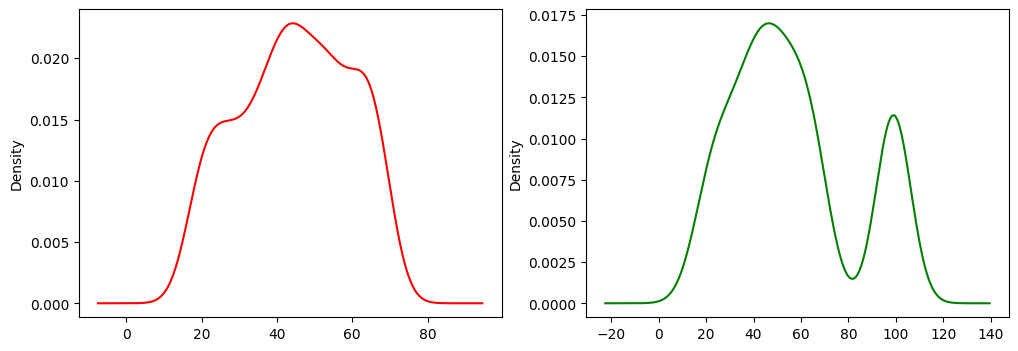

In [ ]:
fig=plt.figure(figsize=(12,4))
ax=plt.subplot(121)
X_train['age'].plot(kind='kde',color='red',ax=ax)

ax2=plt.subplot(122)
transformed['age'].plot(kind='kde',color='green',ax=ax2)

# Dealing With Categorical Missing Data

In [5]:
data=pd.read_csv('/content/housing_dataset.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
data.isnull().mean()

,0
FireplaceQu,0.472603
GarageQual,0.055479
SalePrice,0.000000


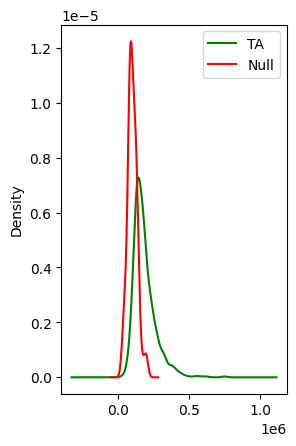

In [16]:
fig=plt.figure()
ax=plt.subplot(121)
data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='green',ax=ax)
data[data['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',color='red',ax=ax)
lines,labels=ax.get_legend_handles_labels()
labels=['TA','Null']
ax.legend(lines,labels,loc='best')



In [ ]:
mode=data['GarageQual'].mode()
print(mode)
data['GarageQual']=data['GarageQual'].fillna('TA')

0    TA
Name: GarageQual, dtype: object


In [ ]:
data.isnull().sum()

,0
FireplaceQu,690
GarageQual,0
SalePrice,0


## Imputing Using Most Frequent

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['SalePrice'],axis=1),data['SalePrice'])

In [19]:
imputer3=SimpleImputer(strategy='most_frequent')
imputer3.fit_transform(X_train)
imputer3.transform(X_test)

array([['TA', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'Gd'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Po', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['TA', 'Gd'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd',

## Creating a Missing Column

In [23]:
imp4=SimpleImputer(strategy='constant',fill_value='missing')
imp4.fit_transform(X_train)
imp4.transform(X_test)
data.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0
